Importing libraries: pandas and nltk (natural language toolkit). Tokenize is used to split text into words. Matplotlib for plotting.

In [22]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk import tokenize

In [23]:
smsDF = pd.read_csv('textMessageCorpus.csv',delimiter='\t')

Let's take a look at the data:

In [24]:
smsDF.head()

,class,subscriber,message_body,timestamp,type
0,0,1,Hey sir I have a question on software I am doi...,4/4/11 14:40,Incoming
1,0,1,s the same guys name as the first but it will ...,4/4/11 14:40,Incoming
2,0,1,thing that I have to do to allow me to do it,4/4/11 14:40,Incoming
3,0,1,"The identity field must be unique, but you can...",4/4/11 14:41,Outgoing
4,0,1,Ok thank u sir,4/4/11 14:42,Incoming


We can now create a new column where the text messages are tokenized by words

In [25]:
# create a tokenized column
smsDF['tokenized'] = smsDF['message_body'].apply(lambda row: nltk.word_tokenize(row))

Looking at the column of tokens we get the following:

In [26]:
smsDF['tokenized'].head()

0    [Hey, sir, I, have, a, question, on, software,...
1    [s, the, same, guys, name, as, the, first, but...
2    [thing, that, I, have, to, do, to, allow, me, ...
3    [The, identity, field, must, be, unique, ,, bu...
4                                  [Ok, thank, u, sir]
Name: tokenized, dtype: object

And now we create a column of bigrams on a per text message basis:

In [27]:
smsDF['bigrams'] = smsDF['tokenized'].apply(lambda row: nltk.bigrams(row))
# compile list of bigrams
bigramsList = []
for bigramObj in smsDF.bigrams:
    for bigram in list(bigramObj):
        bigramsList.append(bigram)

Let's take a look at the first five elements of the bigrams

In [28]:
print(bigramsList[0:5])

[('Hey', 'sir'), ('sir', 'I'), ('I', 'have'), ('have', 'a'), ('a', 'question')]


We see that we have a list of pairs of words. The first word is the condition while the second word is the outcome. Now, we create a conditional frequency distribution.

In [29]:
cfd = nltk.ConditionalFreqDist(bigramsList)

We can plot the numer of occurrences of different word outcomes after inputing the word "why"

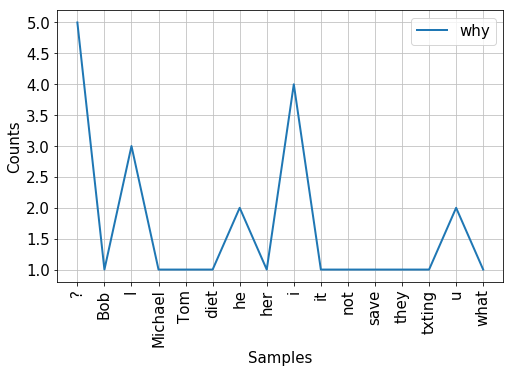

In [30]:
plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size':15})
cfd.plot(conditions=['why'])

We see that the most common occurrence is the question mark "?" followed by the word "I" or "i","u", and "he." Looking at the probability distribution conditional on the word "want" we get that the most common outcome is "to" followed by "me".

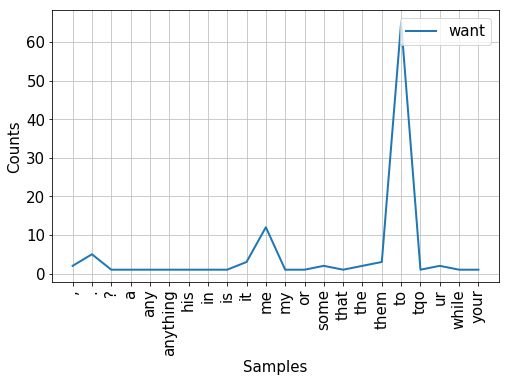

In [31]:
plt.figure(figsize=(8, 5))
cfd.plot(conditions=['want'])

Next, we define a function to suggest the next word with the associated conditional probability, given the previous word:

In [32]:
def suggestWord(previousWord, nSuggestions):
    common=cfd[previousWord].most_common(n=nSuggestions)
    n = min(len(cfd[previousWord]),nSuggestions)
    for i in range(n):
        word = common[i][0]
        total = sum(cfd[previousWord].values())
        counts = common[i][1]
        print(word + ': ' + str(round(counts/total,2)))
    

Let's try obtaining suggestions for some common use cases:

In [33]:
suggestWord('get',5)

a: 0.08
it: 0.07
in: 0.06
there: 0.05
off: 0.04


In [34]:
suggestWord('try',3)

to: 0.5
it: 0.11
and: 0.11


In [35]:
suggestWord('come',4)

over: 0.12
out: 0.09
by: 0.08
up: 0.07


In [36]:
suggestWord('please',3)

.: 0.3
return: 0.15
send: 0.1


In [37]:
suggestWord('would',4)

be: 0.13
like: 0.13
you: 0.1
have: 0.09


In [38]:
suggestWord('love',4)

you: 0.26
u: 0.23
and: 0.1
your: 0.05


We can also try to predict a phrase by sugesting the next word, selecting the word with highest likelyhood, and using it as the condition for the following word, and so on in a loop. Here, we create function to output a suggested phrase:

In [39]:
def suggestPhrase(cfdist, word, num=4):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()
    print()

Let's try it with the words "I" and "please"

In [40]:
suggestPhrase(cfd,'I',num=4)
suggestPhrase(cfd,'Please',num=4)

I am going to 
Please let me . 


Of course, this model is too crude for longer predictions, as we can see when we try to predict many words:

In [41]:
suggestPhrase(cfd,'Please',num=10)

Please let me . I am going to get a 


This concludes our simple next-word prediction model. We could improve on this simple system by collecting more data and possibly by using words that occur earlier in the sentence as conditions as well.